<a href="https://colab.research.google.com/github/anirudh027/UNP-Assignments/blob/main/Decisioon_trees_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz

In [ ]:
data=pd.read_csv("Titanic.csv")
del data["PassengerId"]



In [ ]:
data.head()

,Pclass,Gender,Age,SibSp,Embarked,Survived
0,3,1,22.0,1,0.0,0
1,1,0,38.0,1,1.0,1
2,3,0,26.0,0,0.0,1
3,1,0,35.0,1,0.0,1
4,3,1,35.0,0,0.0,0


In [ ]:
data['Gender'].replace(['female','male'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [ ]:
for i in data.columns:
    data[i].fillna(int(data[i].median()),inplace=True)

In [ ]:
data.fillna(-100,inplace=True)

In [ ]:
data.head(10)

,Pclass,Gender,Age,SibSp,Embarked,Survived
0,3,1,22.0,1,0.0,0
1,1,0,38.0,1,1.0,1
2,3,0,26.0,0,0.0,1
3,1,0,35.0,1,0.0,1
4,3,1,35.0,0,0.0,0
5,3,1,28.0,0,2.0,0
6,1,1,54.0,0,0.0,0
7,3,1,2.0,3,0.0,0
8,3,0,27.0,0,0.0,1
9,2,0,14.0,1,1.0,1


In [ ]:
x=data.iloc[:,0:5]
y=data.iloc[:,5:6]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 5)
(268, 5)
(623, 1)
(268, 1)


In [ ]:
dt=DecisionTreeClassifier(max_depth=8, min_samples_split=8, max_leaf_nodes=20)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_split=8)

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print('*'*55)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       166
           1       0.70      0.69      0.69       102

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

*******************************************************
[[136  30]
 [ 32  70]]


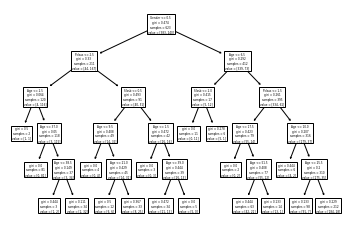

In [ ]:
plot_tree(dt,feature_names=["Pclass","Gender","Age","Sibsb","Embarked"])
plt.savefig('out.pdf')

In [ ]:
rf=RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=2, max_leaf_nodes=7)
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=5, max_leaf_nodes=7, n_estimators=10)

In [ ]:
y_pred1=rf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred1))
print('*'*55)
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       170
           1       0.79      0.68      0.73        98

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268

*******************************************************
[[152  18]
 [ 31  67]]


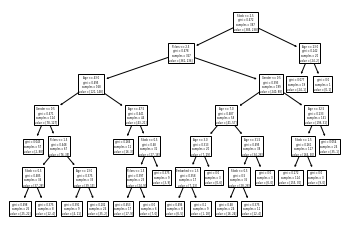

In [ ]:
plot_tree(rf.estimators_[0],feature_names=["Pclass","Gender","Age","Sibsb","Embarked"])
plt.savefig('out1.pdf')

